In [1]:
######过采样2：1，全部数据，5种模型#######
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

df = pd.read_csv("train10.csv",index_col=None)
df = df.drop(columns=["Unnamed: 0","depmap_id","drugname1","drugname2","drug1","drug2","cell line","score","seneitive10","drug_combination","cancer"])
#R1之后做特征集筛选删除mut数据#
df = df.loc[:, ~df.columns.str.startswith('mut_')]
X = df.drop(columns=["cut4"])
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)



随机过采样后的分类情况：Counter({0: 114074, 1: 57037})


logistic

Best accuracy: 0.7583582969689823
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.756764916783032
Precision: 0.6745570723206505
Recall: 0.5249180698383998
F1 Score: 0.5904035589450269
混淆矩阵: [[30814  4482]
 [ 8408  9290]]
Logistic Regression AUC: 0.8148067446987828


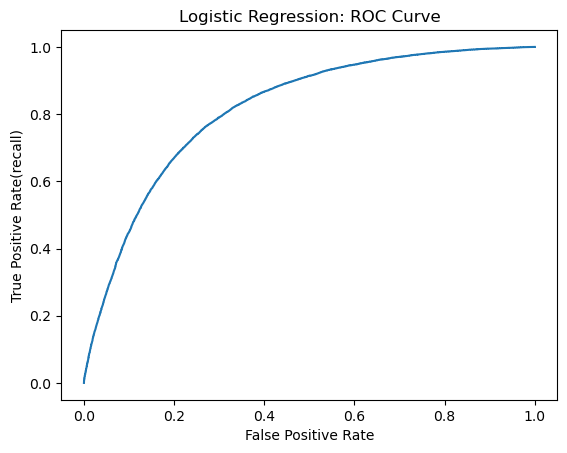

Logistic Regression AUPR: 0.6582290553720515


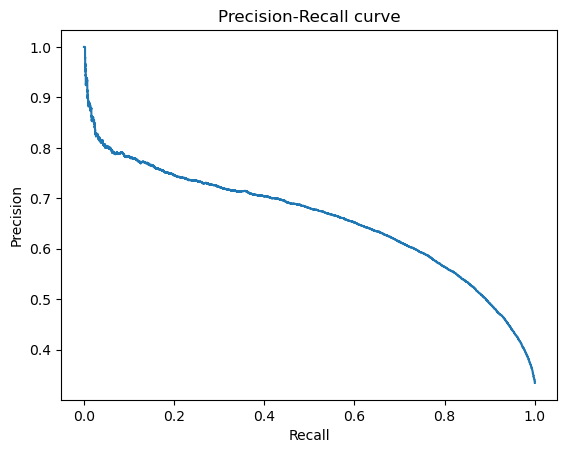

In [2]:
#Logistic#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
logreg = LogisticRegression(**best_params)
logreg.fit(X_train, y_train.astype('int'))

LRpredictions = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LRpredictions))
print("Precision:",precision_score(y_test,LRpredictions))
print("Recall:",recall_score(y_test,LRpredictions))
print("F1 Score:",f1_score(y_test,LRpredictions))
print("混淆矩阵:",confusion_matrix(y_test,LRpredictions))

y_score = logreg.fit(X_train,y_train).predict_proba(X_test)
LR_fpr,LR_tpr,thresholds=roc_curve(y_test, y_score[:,1])
LR_auc =auc(LR_fpr,LR_tpr)
print("Logistic Regression AUC:",LR_auc)
plt.plot(LR_fpr,LR_tpr)
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LR_precision, LR_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
LR_aupr = auc(LR_recall, LR_precision)
print("Logistic Regression AUPR:", LR_aupr)
plt.plot(LR_recall, LR_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(logreg, "models/logistic3.pkl")

['models/logistic3.pkl']

Accuracy: 0.7591425444389931
Precision: 0.6774564810818587
Recall: 0.5321505254831055
F1 Score: 0.5960759493670886
混淆矩阵: [[30812  4484]
 [ 8280  9418]]
Logistic Regression AUC: 0.8175249539672722


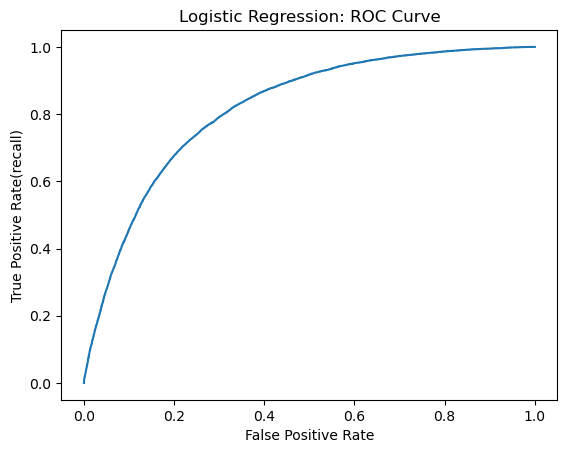

Logistic Regression AUPR: 0.6613191763612682


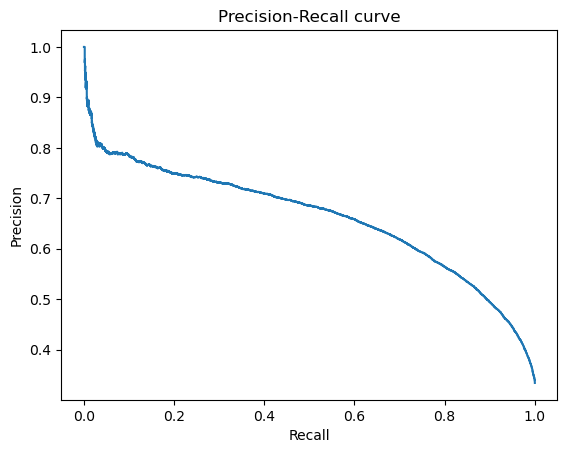

In [9]:
logreg = joblib.load('models/logistic3.pkl')
LRpredictions = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LRpredictions))
print("Precision:",precision_score(y_test,LRpredictions))
print("Recall:",recall_score(y_test,LRpredictions))
print("F1 Score:",f1_score(y_test,LRpredictions))
print("混淆矩阵:",confusion_matrix(y_test,LRpredictions))

y_score = logreg.fit(X_train,y_train).predict_proba(X_test)
LR_fpr,LR_tpr,thresholds=roc_curve(y_test, y_score[:,1])
LR_auc =auc(LR_fpr,LR_tpr)
print("Logistic Regression AUC:",LR_auc)
plt.plot(LR_fpr,LR_tpr)
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LR_precision, LR_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
LR_aupr = auc(LR_recall, LR_precision)
print("Logistic Regression AUPR:", LR_aupr)
plt.plot(LR_recall, LR_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

lasso

Best accuracy: 0.7575657506781459
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7563686455070385
Precision: 0.6737568058076225
Recall: 0.5244095378008815
F1 Score: 0.5897753630095639
混淆矩阵: [[30802  4494]
 [ 8417  9281]]
Lasso Regression AUC: 0.8128127546310122


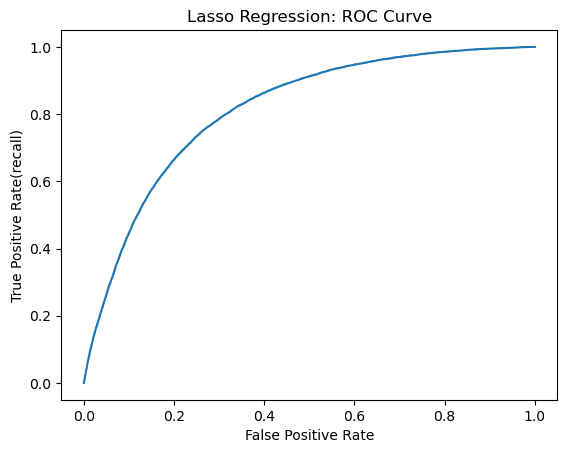

Lasso AUPR: 0.6525604907533477


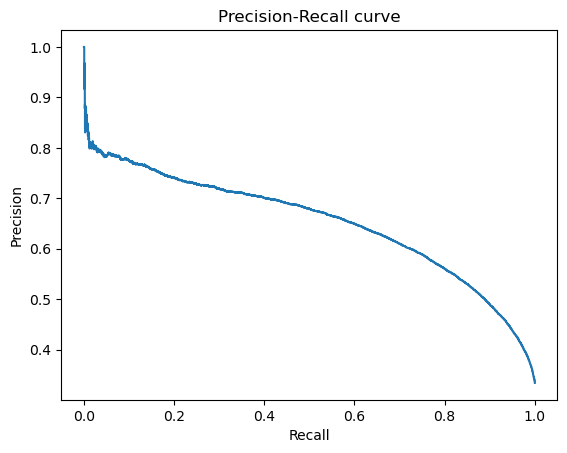

In [4]:
#lasso#
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

lasso = LogisticRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
lasso = LogisticRegression(**best_params)
lasso.fit(X_train, y_train.astype('int'))

LApredictions = lasso.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LApredictions))
print("Precision:",precision_score(y_test,LApredictions))
print("Recall:",recall_score(y_test,LApredictions))
print("F1 Score:",f1_score(y_test,LApredictions))
print("混淆矩阵:",confusion_matrix(y_test,LApredictions))

y_score = lasso.fit(X_train,y_train).predict_proba(X_test)
LA_fpr,LA_tpr,LA_thresholds=roc_curve(y_test, y_score[:,1])
LA_auc =auc(LA_fpr,LA_tpr)
print("Lasso Regression AUC:",LA_auc)
plt.plot(LA_fpr,LA_tpr)
plt.title("Lasso Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LA_precision, LA_recall, LA_thresholds = precision_recall_curve(y_test, y_score[:,1])
LA_aupr = auc(LA_recall, LA_precision)
print("Lasso AUPR:", LA_aupr)
plt.plot(LA_recall, LA_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [5]:
import joblib
joblib.dump(lasso, "models/lasso3.pkl")

['models/lasso3.pkl']

Accuracy: 0.7586896629807148
Precision: 0.6763142775064637
Recall: 0.5320940219233812
F1 Score: 0.5955980013914364
混淆矩阵: [[30789  4507]
 [ 8281  9417]]
Lasso Regression AUC: 0.8162997203150634


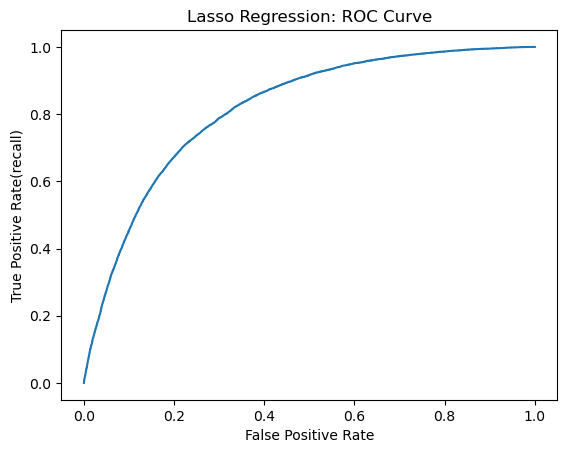

Lasso AUPR: 0.6584412591976474


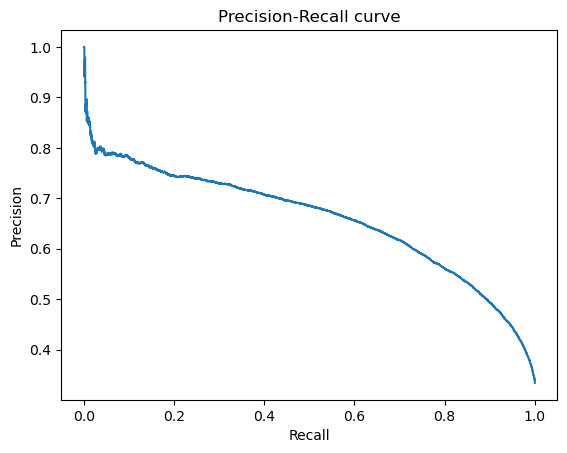

In [10]:
lasso = joblib.load('models/lasso3.pkl')
LApredictions = lasso.predict(X_test)
print("Accuracy:",accuracy_score(y_test,LApredictions))
print("Precision:",precision_score(y_test,LApredictions))
print("Recall:",recall_score(y_test,LApredictions))
print("F1 Score:",f1_score(y_test,LApredictions))
print("混淆矩阵:",confusion_matrix(y_test,LApredictions))

y_score = lasso.fit(X_train,y_train).predict_proba(X_test)
LA_fpr,LA_tpr,LA_thresholds=roc_curve(y_test, y_score[:,1])
LA_auc =auc(LA_fpr,LA_tpr)
print("Lasso Regression AUC:",LA_auc)
plt.plot(LA_fpr,LA_tpr)
plt.title("Lasso Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

LA_precision, LA_recall, LA_thresholds = precision_recall_curve(y_test, y_score[:,1])
LA_aupr = auc(LA_recall, LA_precision)
print("Lasso AUPR:", LA_aupr)
plt.plot(LA_recall, LA_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

RF

Accuracy: 0.9530701588859116
Precision: 0.9721273822087032
Recall: 0.8848457452819528
F1 Score: 0.9264353536249889
Confusion Matrix:
 [[34847   449]
 [ 2038 15660]]
Random Forest AUC: 0.9847376186702823


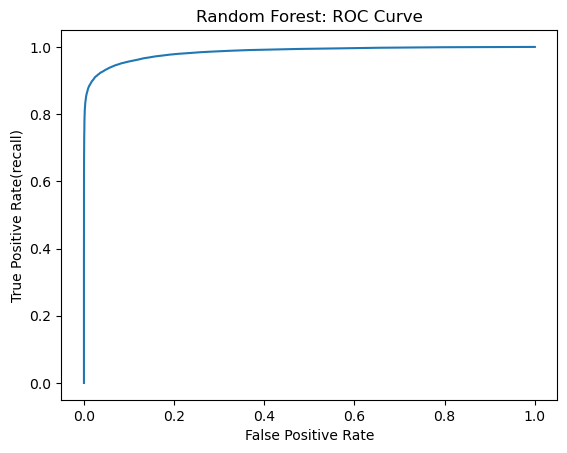

Random Forest AUPR: 0.978921741085888


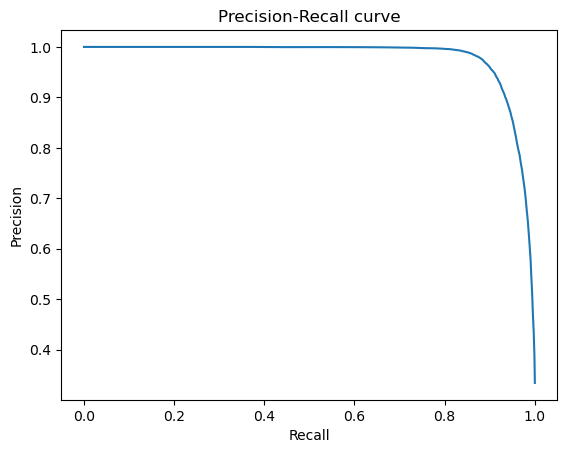

In [6]:
#设置权重
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,5,7,9,11],
    'max_features':np.arange(5,11,2),
  
}

rfc = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #不平衡处理
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train.astype('int'))

RFpredictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,RFpredictions))
print("Precision:",precision_score(y_test,RFpredictions))
print("Recall:",recall_score(y_test,RFpredictions))
print("F1 Score:",f1_score(y_test,RFpredictions))
print("混淆矩阵:",confusion_matrix(y_test,RFpredictions))

y_score = rfc.fit(X_train,y_train).predict_proba(X_test)
RF_fpr,RF_tpr,RF_thresholds=roc_curve(y_test, y_score[:,1])
RF_auc =auc(RF_fpr,RF_tpr)
print("Random Forest AUC:",RF_auc)
plt.plot(RF_fpr,RF_tpr)
plt.title("Random Forest: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_score[:,1])
RF_aupr = auc(RF_recall, RF_precision)
print("Random Forest AUPR:", RF_aupr)
plt.plot(RF_recall, RF_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [7]:
import joblib
joblib.dump(rfc, "models/rfc3.pkl")

['models/rfc3.pkl']

Accuracy: 0.9535419104049515
Precision: 0.9718780971258671
Recall: 0.8865408520736806
F1 Score: 0.9272501625199456
混淆矩阵: [[34842   454]
 [ 2008 15690]]
Random Forest AUC: 0.9840508225122785


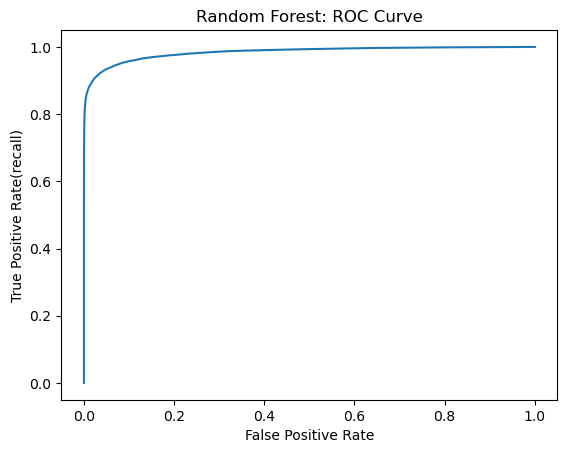

Random Forest AUPR: 0.9785013895693486


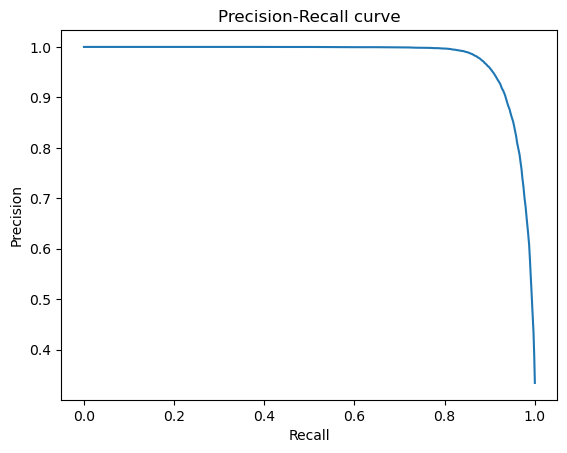

In [11]:
rfc = joblib.load('models/rfc3.pkl')
RFpredictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,RFpredictions))
print("Precision:",precision_score(y_test,RFpredictions))
print("Recall:",recall_score(y_test,RFpredictions))
print("F1 Score:",f1_score(y_test,RFpredictions))
print("混淆矩阵:",confusion_matrix(y_test,RFpredictions))

y_score = rfc.fit(X_train,y_train).predict_proba(X_test)
RF_fpr,RF_tpr,RF_thresholds=roc_curve(y_test, y_score[:,1])
RF_auc =auc(RF_fpr,RF_tpr)
print("Random Forest AUC:",RF_auc)
plt.plot(RF_fpr,RF_tpr)
plt.title("Random Forest: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test, y_score[:,1])
RF_aupr = auc(RF_recall, RF_precision)
print("Random Forest AUPR:", RF_aupr)
plt.plot(RF_recall, RF_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

svm

/boot2/chenjiaqi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.8363965731969657
Precision: 0.769010727056019
Recall: 0.7291219346818849
F1 Score: 0.7485352978711061
混淆矩阵: [[31420  3876]
 [ 4794 12904]]


/boot2/chenjiaqi/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM AUC: 0.9043828291752418


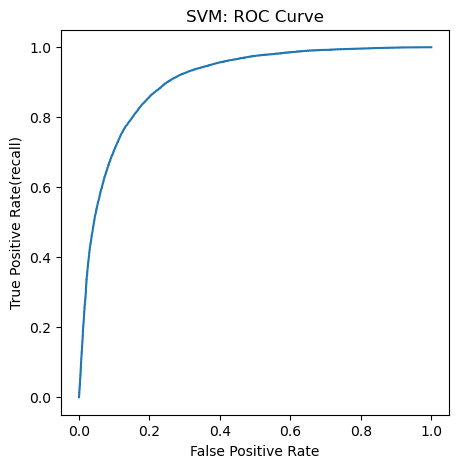

SVM AUPR: 0.8060877374270096


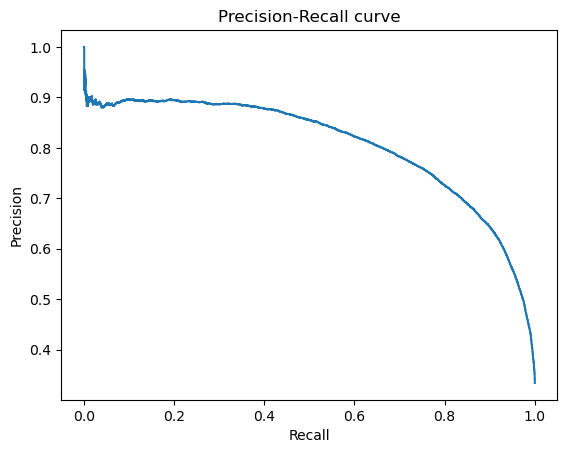

In [2]:
param_grid = {

     'C': [1,5,10],
     'kernel': ['liner','poly', 'rbf'],
     'gamma': ['scale', 'auto'],

 }


svm = SVC()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
svm = SVC(**best_params)
svm.fit(X_train, y_train.astype('int'))

SVMpredictions = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test,SVMpredictions))
print("Precision:",precision_score(y_test,SVMpredictions))
print("Recall:",recall_score(y_test,SVMpredictions))
print("F1 Score:",f1_score(y_test,SVMpredictions))
print("混淆矩阵:",confusion_matrix(y_test,SVMpredictions))

y_score = svm.fit(X_train,y_train).decision_function(X_test)
plt.figure(figsize=(5,5))
SVM_fpr,SVM_tpr,SVM_thresholds=roc_curve(y_test, y_score)
SVM_auc =auc(SVM_fpr,SVM_tpr)
print("SVM AUC:",SVM_auc)
plt.plot(SVM_fpr,SVM_tpr)
plt.title("SVM: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(recall)")
plt.show()

SVM_precision, SVM_recall, SVM_thresholds = precision_recall_curve(y_test, y_score)
SVM_aupr = auc(SVM_recall, SVM_precision)
print("SVM AUPR:", SVM_aupr)
plt.plot(SVM_recall, SVM_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(svm, "models/svm3.pkl")

['models/svm3.pkl']

xgboost

Best accuracy: 0.93308397010316
Best parameters: {'learning_rate': 0.05, 'max_depth': 11, 'min_child_weight': 2, 'n_estimators': 300}
Accuracy: 0.934663822575461
Precision: 0.9629402756508423
Recall: 0.8343210968597965
F1 Score: 0.8940284360189573
混淆矩阵: [[22555   363]
 [ 1873  9432]]
XGbooost_auc: 0.9683021297127667


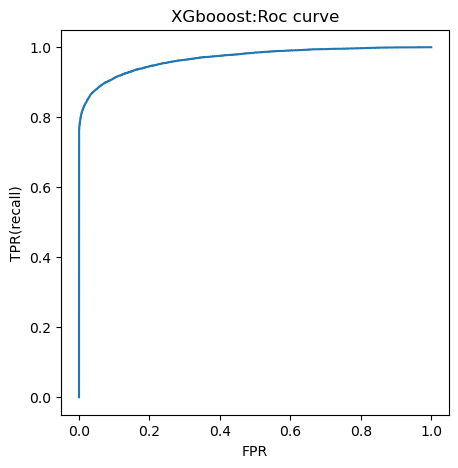

XGboost AUPR: 0.9593406442722447


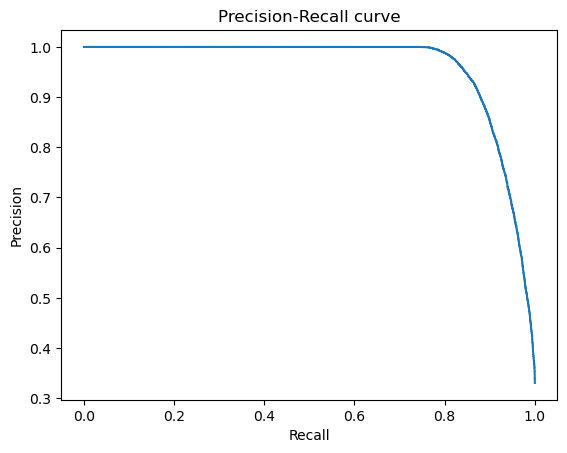

In [2]:
param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train.astype('int'))
XBpredictions = xgb.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [3]:
import joblib
joblib.dump(xgb, "models/xgboost3.pkl")

['models/xgboost3.pkl']

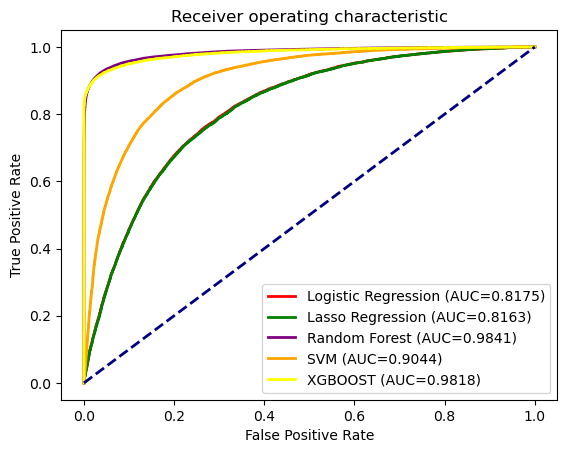

In [12]:
plt.plot(LR_fpr, LR_tpr, color='red', lw=2, label='Logistic Regression (AUC=%0.4f)' % LR_auc)
plt.plot(LA_fpr, LA_tpr, color='green', lw=2, label='Lasso Regression (AUC=%0.4f)' % LA_auc)
plt.plot(RF_fpr, RF_tpr, color='purple', lw=2, label='Random Forest (AUC=%0.4f)' % RF_auc)
plt.plot(SVM_fpr, SVM_tpr, color='orange', lw=2, label='SVM (AUC=%0.4f)' % SVM_auc)
plt.plot(XB_fpr, XB_tpr, color='yellow', lw=2, label='XGBOOST (AUC=%0.4f)' % XB_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.plot(LR_recall, LR_precision, color='red', lw=2, label='Logistic Regression (AUPR=%0.4f)' % LR_aupr)
plt.plot(LA_recall, LA_precision, color='green', lw=2, label='Lasso Regression (AUPR=%0.4f)' % LA_aupr)
plt.plot(RF_recall, RF_precision, color='purple', lw=2, label='Random Forest (AUPR=%0.4f)' % RF_aupr)
plt.plot(SVM_recall, SVM_precision, color='orange', lw=2, label='SVM (AUPR=%0.4f)' % SVM_aupr)
plt.plot(XB_recall, XB_precision, color='yellow', lw=2, label='XGBOOST (AUPR=%0.4f)' % XB_aupr)

#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

XGBOOST结果最好，现在输出所有特征重要性

In [7]:
# 将 X_train 转换为 DataFrame
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=["cut4"]).columns)

# 获取特征重要性
feature_importances = xgb.feature_importances_

# 创建一个DataFrame来存储特征名称和对应的重要性
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                                               Feature  Importance
87                                   DD_maccs_maccs145    0.078822
90                                   DD_maccs_maccs148    0.032518
94                                   DD_maccs_maccs152    0.022490
36                                    DD_maccs_maccs92    0.014430
193  DD_tox_Refractory anaemia with an excess of bl...    0.014018
..                                                 ...         ...
159                            DD_tox_Malignant glioma    0.000000
152                            DD_tox_Kaposi's sarcoma    0.000000
151                             DD_tox_Hypomagnesaemia    0.000000
11                                    DD_maccs_maccs61    0.000000
9                                     DD_maccs_maccs58    0.000000

[991 rows x 2 columns]


In [8]:
# 将特征重要性保存到CSV文件
feature_importance_df.to_csv('feature_importance.csv', index=False)


挑选排名靠前的特征重新建模，找拐点

排名第1

In [41]:

# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(1, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")
df_select


Selected Features:


,DD_maccs_maccs145,DD_tox_Refractory anaemia with an excess of blasts,DDP_PI3K-Akt signaling pathway - Homo sapiens (human),exp_Axon guidance - Homo sapiens (human),cnv_Leishmaniasis - Homo sapiens (human),methy_Salmonella infection - Homo sapiens (human),RNAi_Linoleic acid metabolism - Homo sapiens (human)
0,1,0,10.859996,0.186586,-0.141515,0.027208,0.050884
1,0,0,7.632671,0.186586,-0.141515,0.027208,0.050884
2,1,0,12.296560,0.186586,-0.141515,0.027208,0.050884
3,1,0,0.000000,0.186586,-0.141515,0.027208,0.050884
4,0,0,12.161246,0.186586,-0.141515,0.027208,0.050884
...,...,...,...,...,...,...,...
128440,2,0,7.601509,-0.280861,-0.207755,-0.138748,-0.102123
128441,2,0,6.947439,-0.280861,-0.207755,-0.138748,-0.102123
128442,1,0,0.509299,-0.280861,-0.207755,-0.138748,-0.102123
128443,1,0,1.503996,-0.280861,-0.207755,-0.138748,-0.102123


In [42]:
X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

随机过采样后的分类情况：Counter({0: 114074, 1: 57037})


Best accuracy: 0.847429984510802
Best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 700}
Accuracy: 0.8524091984922421
Precision: 0.861419325011558
Recall: 0.659265811587793
F1 Score: 0.7469058475722804
混淆矩阵: [[21719  1199]
 [ 3852  7453]]
XGbooost_auc: 0.9042804917356455


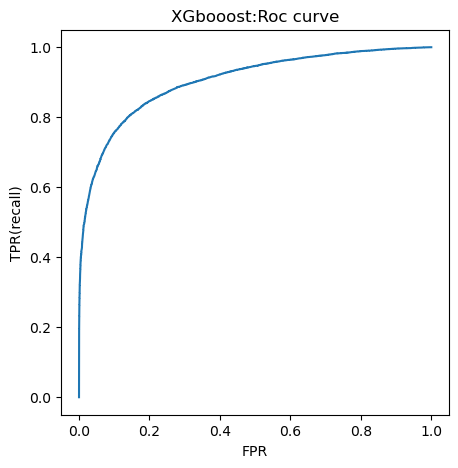

XGboost AUPR: 0.8640586368762515


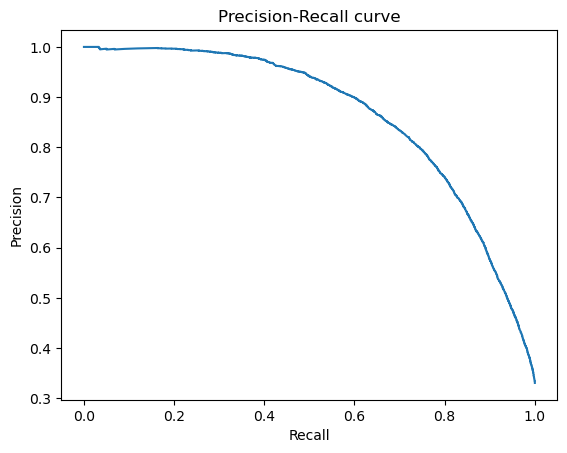

In [43]:
param_grid = {
    
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

排名第2

Selected Features:
随机过采样后的分类情况：Counter({0: 114074, 1: 57037})
Best accuracy: 0.8985447920306209
Best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 2, 'n_estimators': 700}
Accuracy: 0.9050638459515531
Precision: 0.9038500100260678
Recall: 0.7974347633790358
F1 Score: 0.8473142534893556
混淆矩阵: [[21959   959]
 [ 2290  9015]]
XGbooost_auc: 0.9491773933635441


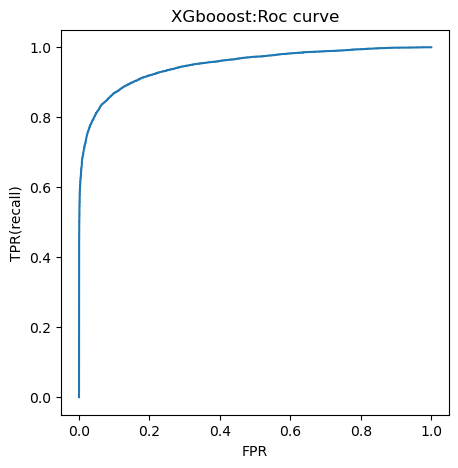

XGboost AUPR: 0.9319952483236074


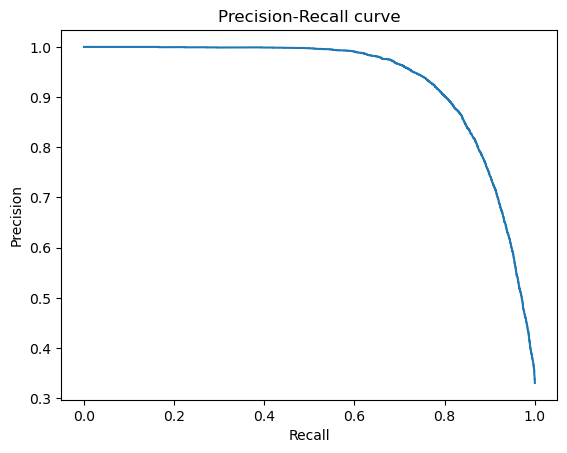

In [37]:

# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(2, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")

X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


排名前3

Selected Features:
随机过采样后的分类情况：Counter({0: 114074, 1: 57037})
Best accuracy: 0.9111317294338228
Best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 2, 'n_estimators': 700}
Accuracy: 0.9156999678578733
Precision: 0.9189054726368159
Recall: 0.8168951791242813
F1 Score: 0.8649028330601732
混淆矩阵: [[22103   815]
 [ 2070  9235]]
XGbooost_auc: 0.9561085212788134


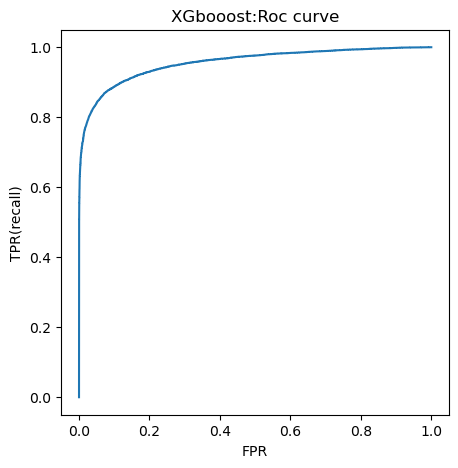

XGboost AUPR: 0.9424517102427151


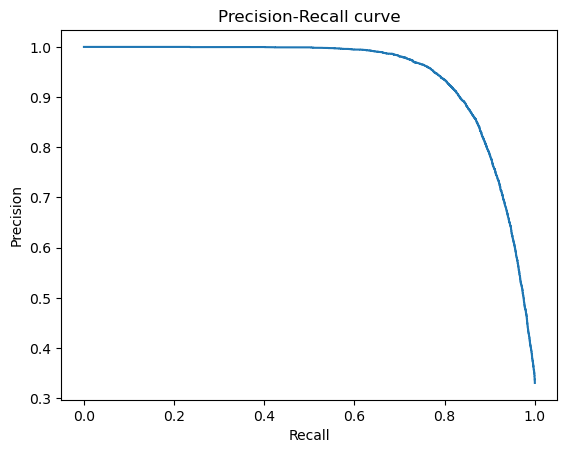

In [38]:

# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(3, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")

X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


排名前4

Selected Features:
随机过采样后的分类情况：Counter({0: 114074, 1: 57037})
Best accuracy: 0.9214613239290512
Best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 700}
Accuracy: 0.9248458638927037
Precision: 0.9346938775510204
Recall: 0.8305174701459531
F1 Score: 0.8795316159250586
混淆矩阵: [[22262   656]
 [ 1916  9389]]
XGbooost_auc: 0.9602438731336022


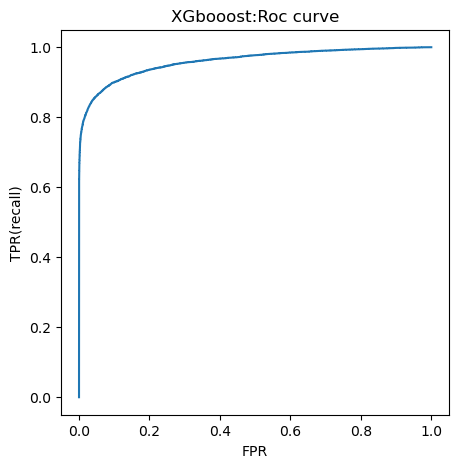

XGboost AUPR: 0.9499332079171112


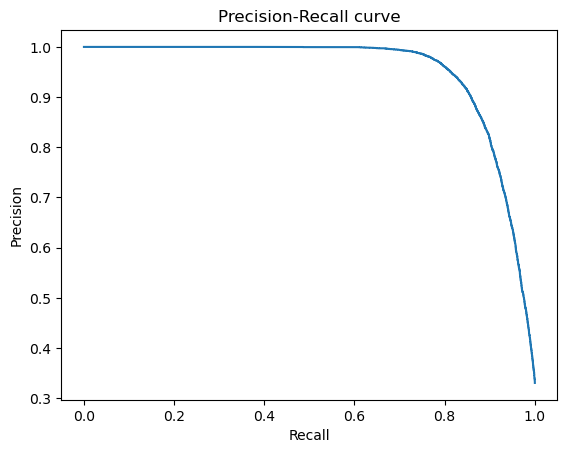

In [39]:
# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(4, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")

X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


前5

Selected Features:
随机过采样后的分类情况：Counter({0: 114074, 1: 57037})
Best accuracy: 0.9252016122807907
Best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 500}
Accuracy: 0.9283814978231014
Precision: 0.9442103150712422
Recall: 0.832375055285272
F1 Score: 0.8847726952188426
混淆矩阵: [[22362   556]
 [ 1895  9410]]
XGbooost_auc: 0.9614096797771291


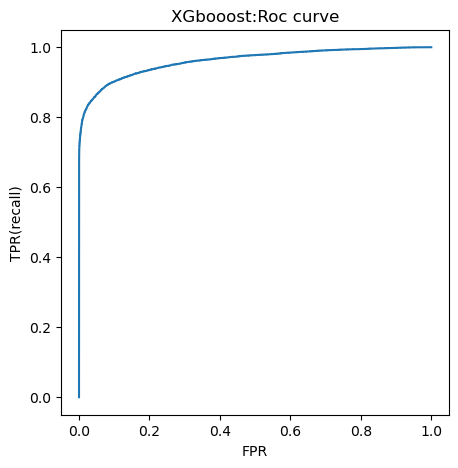

XGboost AUPR: 0.951889541934719


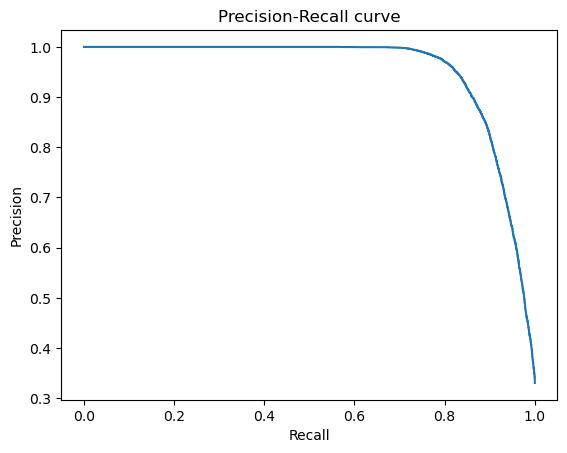

In [44]:
# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(5, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")

X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


前10

Selected Features:
随机过采样后的分类情况：Counter({0: 114074, 1: 57037})
Best accuracy: 0.9309362167690749
Best parameters: {'learning_rate': 0.05, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 500}
Accuracy: 0.9344592817695702
Precision: 0.9622526015098959
Recall: 0.8343210968597965
F1 Score: 0.8937319372719951
混淆矩阵: [[22548   370]
 [ 1873  9432]]
XGbooost_auc: 0.9653001862417474


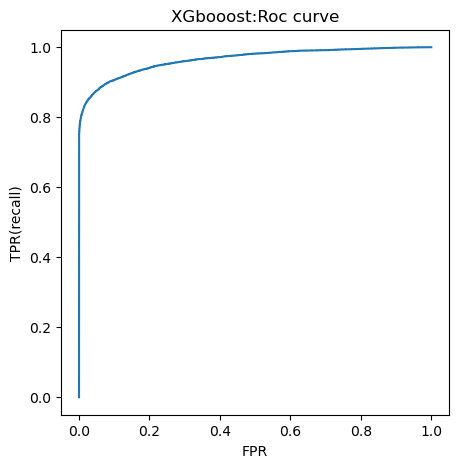

XGboost AUPR: 0.9567001514893256


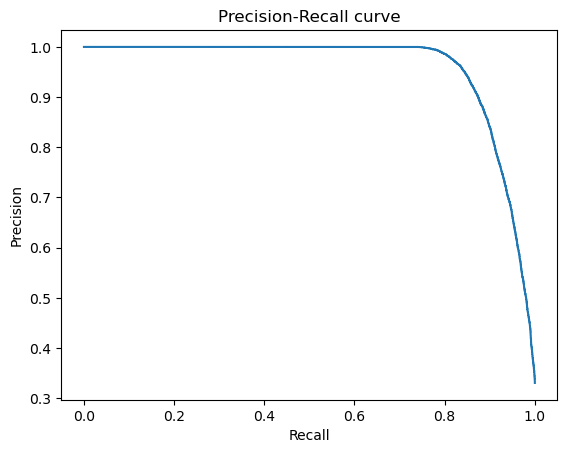

In [53]:
# 预定义的特征组
feature_sets = [
    df.filter(regex='^DD_maccs_'),
    df.filter(regex='^DD_tox_'),
    df.filter(regex='^DDP_'),
    df.filter(regex='^exp_'),
    df.filter(regex='^cnv_'),
    df.filter(regex='^methy_'),
    df.filter(regex='^RNAi_')
]

# 选择每种类型的前两个特征
selected_features = []
for feature_set in feature_sets:
    top_features = feature_importance_df[feature_importance_df['Feature'].isin(feature_set.columns)].nlargest(10, 'Importance')['Feature'].tolist()
    selected_features.extend(top_features)

# 从原始数据中提取选定的特征
df_select = df[selected_features]

# 输出重新组合的特征
print("Selected Features:")

X = df_select
y = df["cut4"]

#归一化#
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)

# smote
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('随机过采样后的分类情况：{}'.format(Counter(y_resampled)))
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=22)

param_grid = {
    'min_child_weight':range(1,4,1),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [7,9,11],
    'n_estimators': [100,300,500,700]
}
xgb1 = XGBClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb1, param_grid=param_grid, cv=skf)
grid_search.fit(X_train, y_train)
print(f"Best accuracy: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

best_params = grid_search.best_params_
xgb1 = XGBClassifier(**best_params)
xgb1.fit(X_train, y_train.astype('int'))
XBpredictions = xgb1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,XBpredictions))
print("Precision:",precision_score(y_test,XBpredictions))
print("Recall:",recall_score(y_test,XBpredictions))
print("F1 Score:",f1_score(y_test,XBpredictions))
print("混淆矩阵:",confusion_matrix(y_test,XBpredictions))

y_score = xgb1.fit(X_train,y_train).predict_proba(X_test)
plt.figure(figsize=(5,5))
XB_fpr,XB_tpr,thresholds=roc_curve(y_test, y_score[:,1])
XB_auc =auc(XB_fpr,XB_tpr)
print("XGbooost_auc:",XB_auc)
plt.plot(XB_fpr,XB_tpr)
plt.title("XGbooost:Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()

XB_precision, XB_recall, XB_thresholds = precision_recall_curve(y_test, y_score[:,1])
XB_aupr = auc(XB_recall, XB_precision)
print("XGboost AUPR:", XB_aupr)
plt.plot(XB_recall, XB_precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [54]:
selected_features

['DD_maccs_maccs145',
 'DD_maccs_maccs148',
 'DD_maccs_maccs152',
 'DD_maccs_maccs92',
 'DD_maccs_maccs57',
 'DD_maccs_maccs54',
 'DD_maccs_maccs97',
 'DD_maccs_maccs149',
 'DD_maccs_maccs120',
 'DD_maccs_maccs90',
 'DD_tox_Refractory anaemia with an excess of blasts',
 'DD_tox_Hypocalcaemia',
 'DD_tox_Hormone-refractory prostate cancer',
 'DD_tox_Thrombocytopenia',
 'DD_tox_Neoplasm malignant',
 'DD_tox_Neoplasm',
 'DD_tox_Neuroblastoma',
 'DD_tox_Choriocarcinoma',
 "DD_tox_Non-Hodgkin's lymphoma",
 'DD_tox_Autoimmune disorder',
 'DDP_PI3K-Akt signaling pathway - Homo sapiens (human)',
 'DDP_Rap1 signaling pathway - Homo sapiens (human)',
 'DDP_Human T-cell leukemia virus 1 infection - Homo sapiens (human)',
 'DDP_Leukocyte transendothelial migration - Homo sapiens (human)',
 'DDP_Chronic myeloid leukemia - Homo sapiens (human)',
 'DDP_Gap junction - Homo sapiens (human)',
 'DDP_Yersinia infection - Homo sapiens (human)',
 'DDP_Hepatitis B - Homo sapiens (human)',
 'DDP_Melanoma - Hom

test数据结果，R3 xgb3model

In [49]:
#数据处理以及归一化
test10=pd.read_csv("test10.csv",index_col=None)
X= test10.drop(columns=["Unnamed: 0","depmap_id","drugname1","drugname2","drug2","cell line"])
X = X.loc[:, ~X.columns.str.startswith('mut_')]
from sklearn.preprocessing import MinMaxScaler
transfer=MinMaxScaler()
X=transfer.fit_transform(X)
xgb = joblib.load('models/xgboost3.pkl')
XBpredictions = xgb.predict(X)

In [52]:
# 假设 test10 是原始表格
test10['score'] = XBpredictions

# 将 'score' 列移动到第一列
cols = test10.columns.tolist()
cols = ['score'] + [col for col in cols if col != 'score']
test10 = test10[cols]

# 保存修改后的表格
test10.to_csv('test10_with_scores.csv', index=False)